# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


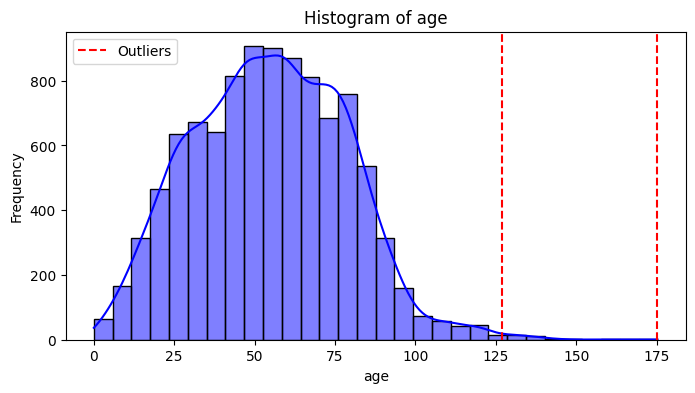

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1541
           1       0.78      0.94      0.85      1455

    accuracy                           0.84      2996
   macro avg       0.85      0.84      0.84      2996
weighted avg       0.86      0.84      0.84      2996

Node Labels:
 Annotation(0.592955, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6988\nvalue = [3485, 3503]\nclass = 1')


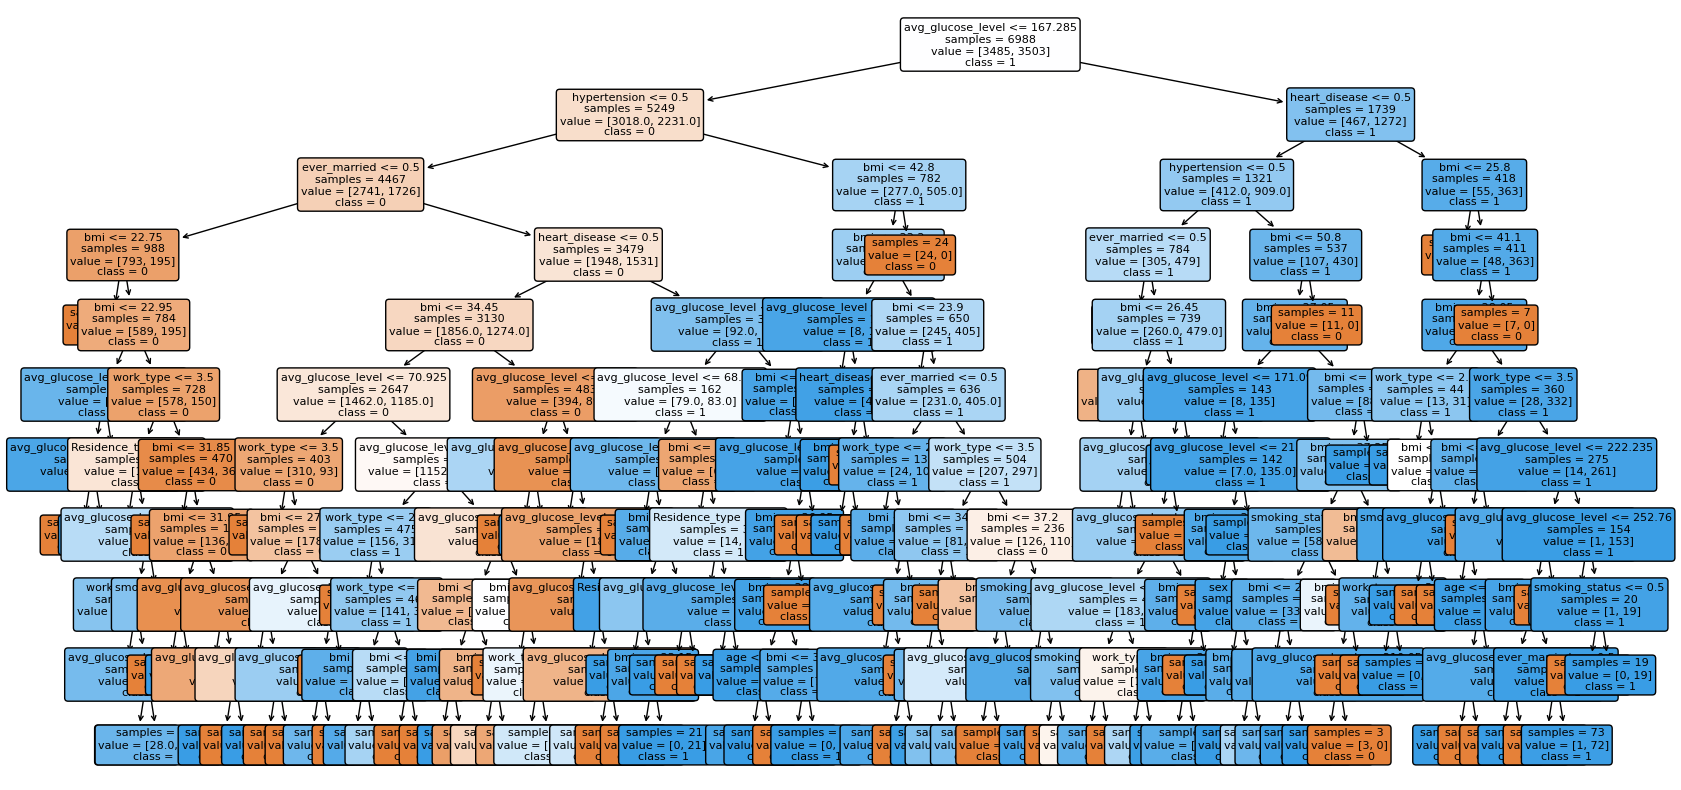

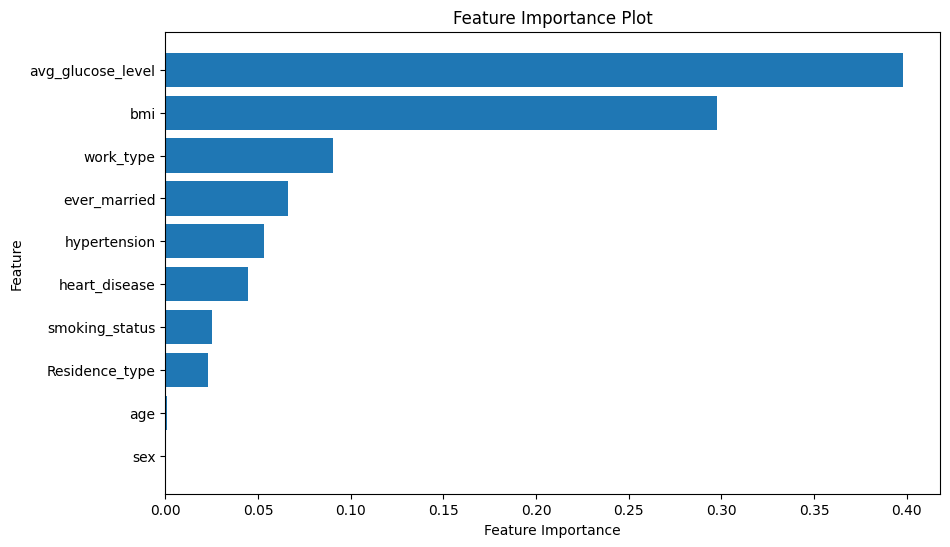

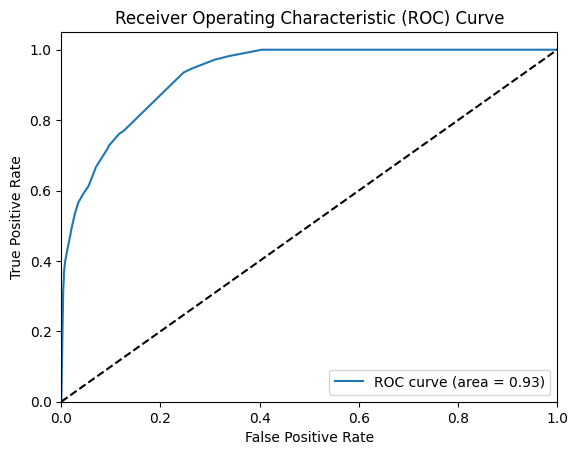

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9295483586103548
Accuracy for each fold: [0.8066666666666666, 0.81, 0.8133333333333334, 0.8433333333333334, 0.8233333333333334, 0.7466666666666667, 0.8294314381270903, 0.7993311036789298, 0.8060200668896321, 0.802675585284281]
Mean accuracy: 0.8080791527313267
95% confidence interval: (0.7898469538495322, 0.8263113516131212)


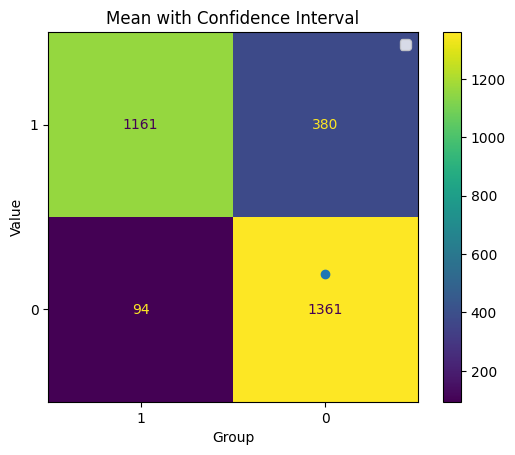

In [6]:
decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



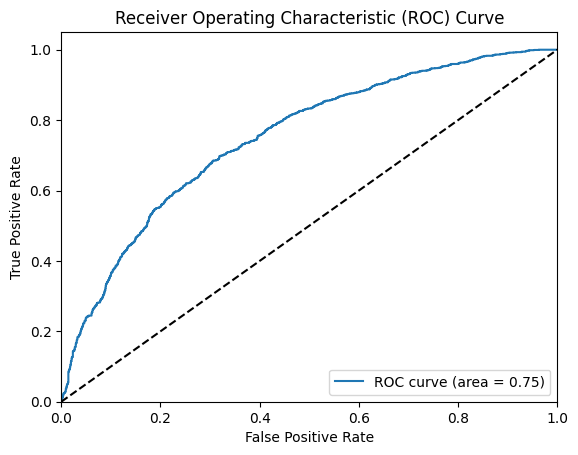

AUC Score: 0.7489687376653263


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.67, 0.6666666666666666, 0.6866666666666666, 0.6366666666666667, 0.6433333333333333, 0.725752508361204, 0.6622073578595318, 0.6287625418060201, 0.705685618729097]
Mean accuracy: 0.6712408026755853
95% confidence interval: (0.6492351925127118, 0.6932464128384588)


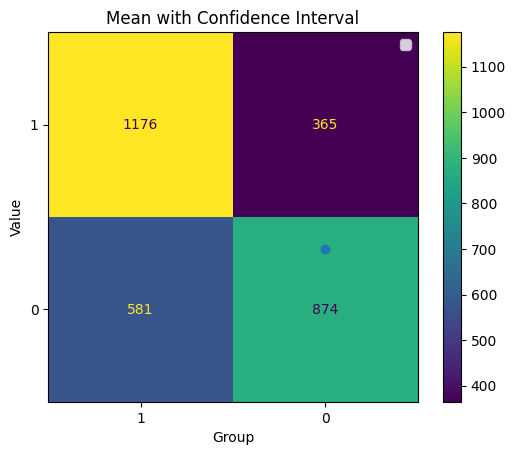

In [7]:
svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


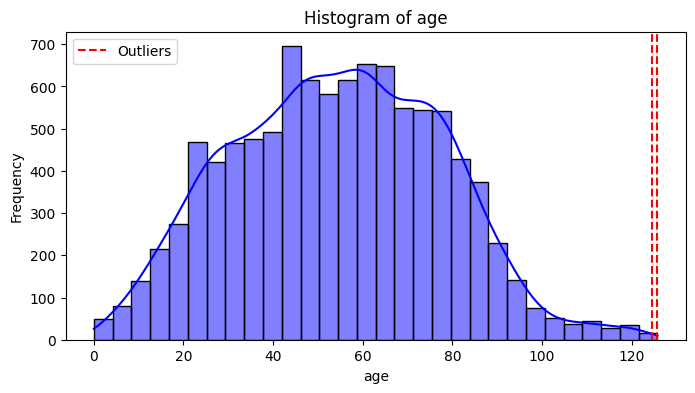

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1541
           1       0.78      0.94      0.85      1455

    accuracy                           0.84      2996
   macro avg       0.85      0.84      0.84      2996
weighted avg       0.86      0.84      0.84      2996

Node Labels:
 Annotation(0.592955, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6988\nvalue = [3485, 3503]\nclass = 1')


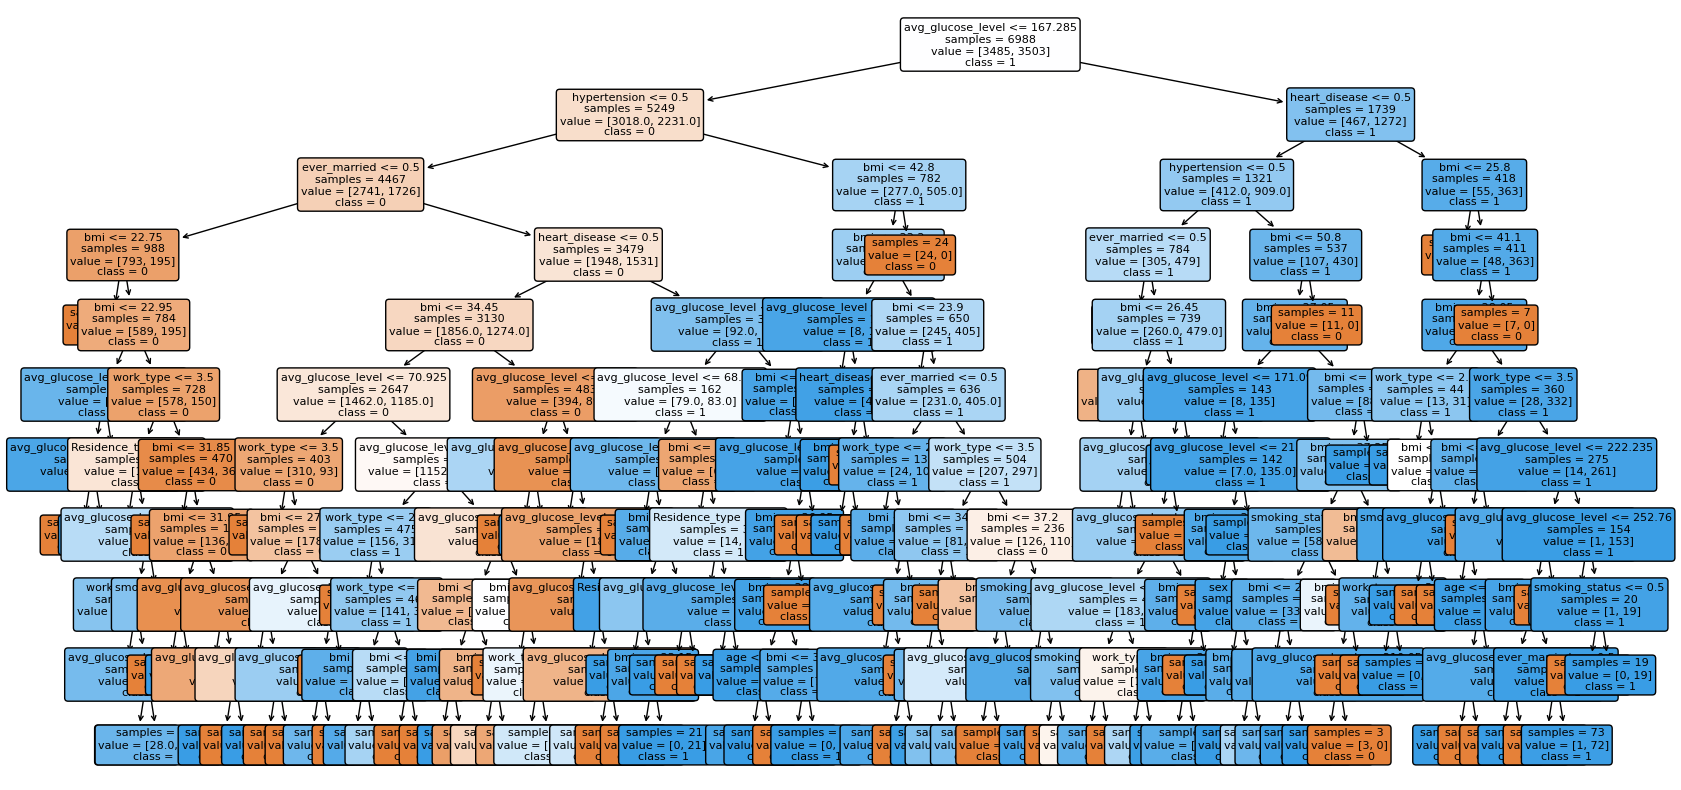

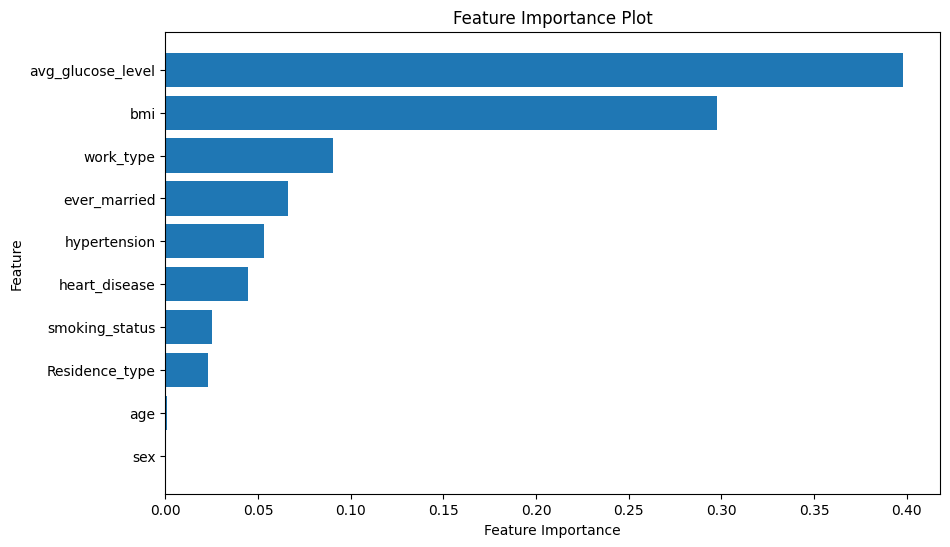

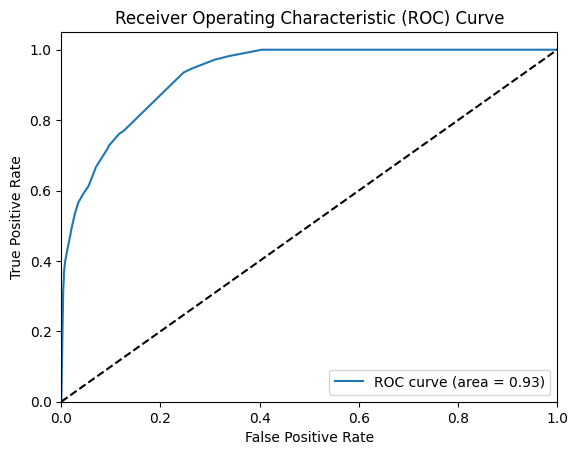

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9295483586103548
Accuracy for each fold: [0.75, 0.84, 0.84, 0.8, 0.7566666666666667, 0.82, 0.8193979933110368, 0.7859531772575251, 0.7725752508361204, 0.7658862876254181]
Mean accuracy: 0.7950479375696767
95% confidence interval: (0.7709394709449416, 0.8191564041944118)


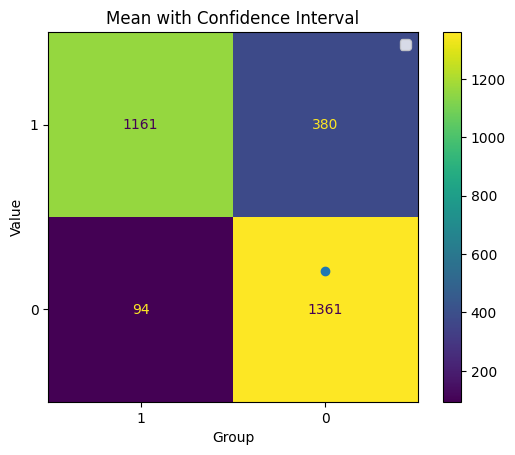

In [10]:
decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



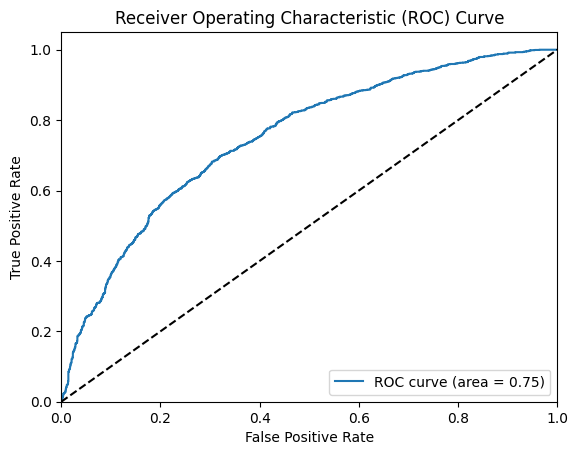

AUC Score: 0.7491239454899415


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.64, 0.6466666666666666, 0.6166666666666667, 0.6766666666666666, 0.6766666666666666, 0.6833333333333333, 0.7123745819397993, 0.6387959866220736, 0.6956521739130435, 0.6923076923076923]
Mean accuracy: 0.6679130434782607
95% confidence interval: (0.6460104960217247, 0.6898155909347968)


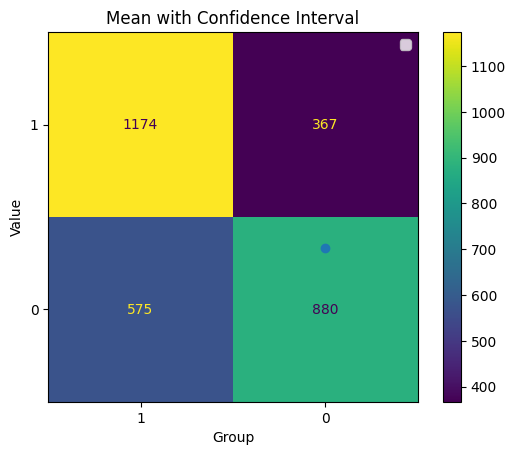

--------------------------------------


In [11]:
svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


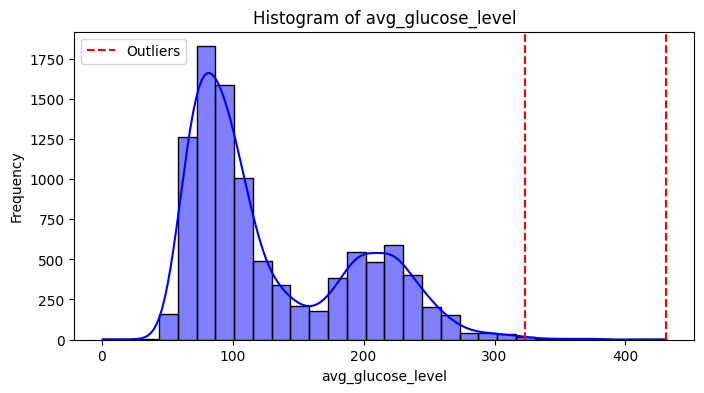

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1541
           1       0.79      0.94      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.604665, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3492, 3496]\nclass = 1')


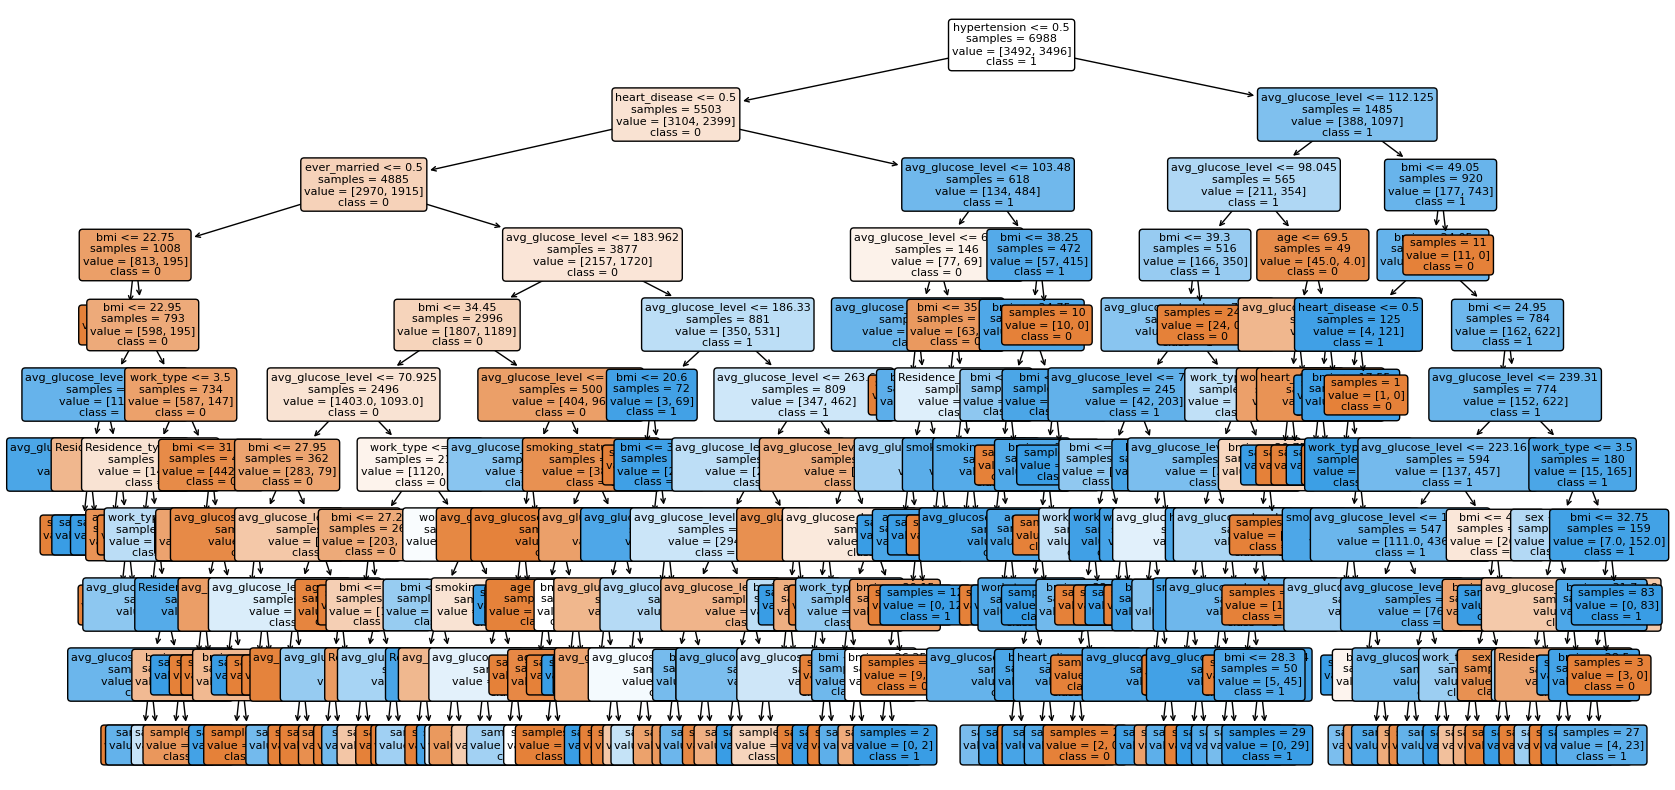

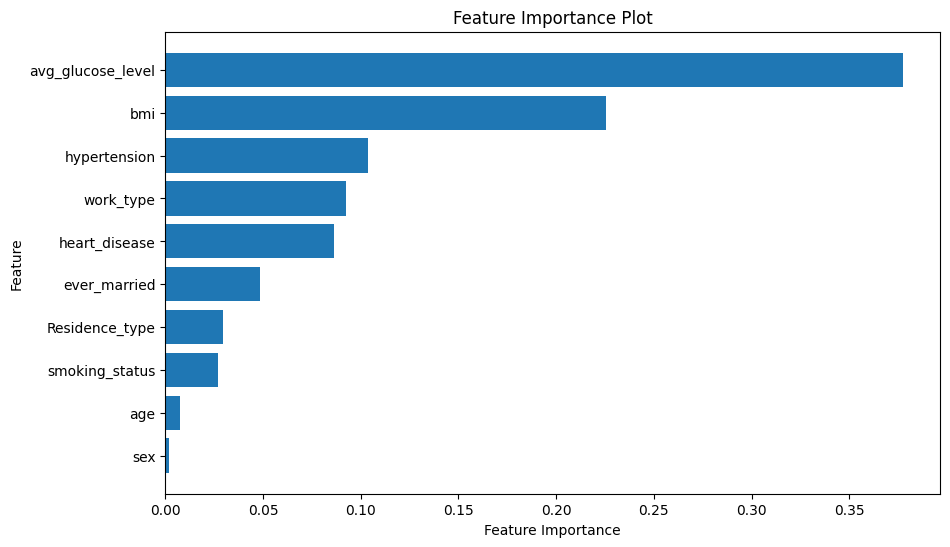

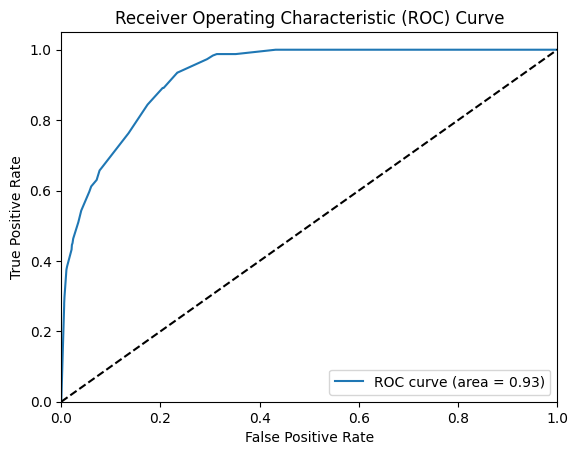

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9258594967787686
Accuracy for each fold: [0.8033333333333333, 0.84, 0.8233333333333334, 0.7866666666666666, 0.8166666666666667, 0.81, 0.7625418060200669, 0.7892976588628763, 0.802675585284281, 0.822742474916388]
Mean accuracy: 0.8057257525083612
95% confidence interval: (0.7898631999011705, 0.8215883051155519)


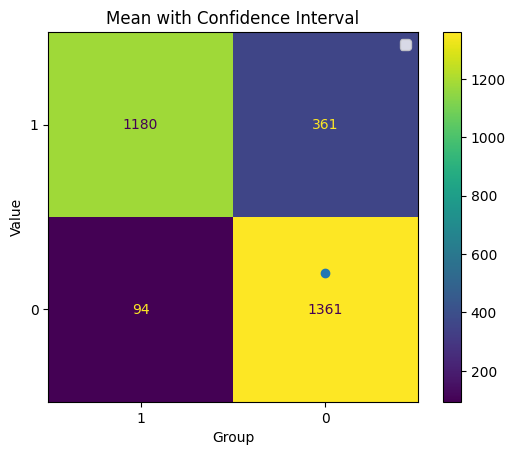

In [16]:
decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



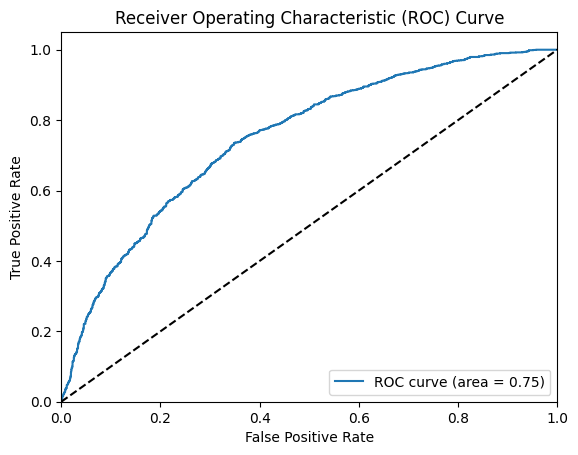

AUC Score: 0.7498152447087735


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6466666666666666, 0.6866666666666666, 0.66, 0.6633333333333333, 0.6066666666666667, 0.63, 0.7090301003344481, 0.6555183946488294, 0.6956521739130435, 0.6488294314381271]
Mean accuracy: 0.6602363433667782
95% confidence interval: (0.6382990160499904, 0.6821736706835659)


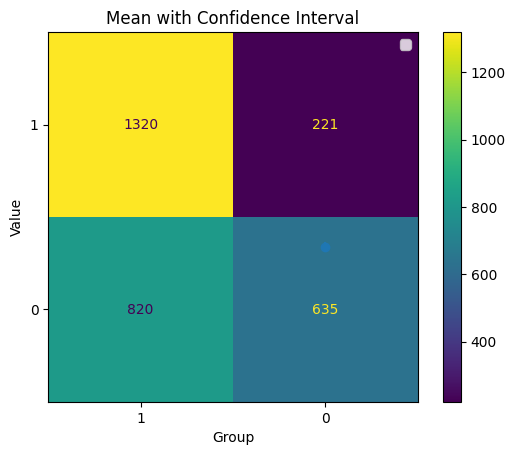

In [17]:
svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


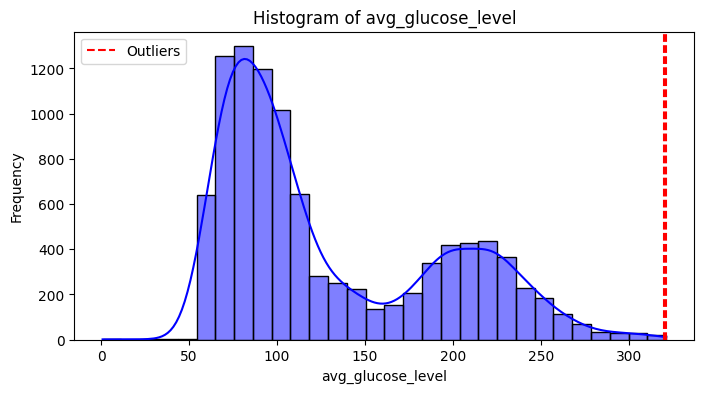

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1541
           1       0.81      0.93      0.87      1455

    accuracy                           0.86      2996
   macro avg       0.87      0.86      0.86      2996
weighted avg       0.87      0.86      0.86      2996

Node Labels:
 Annotation(0.620612, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3492, 3496]\nclass = 1')


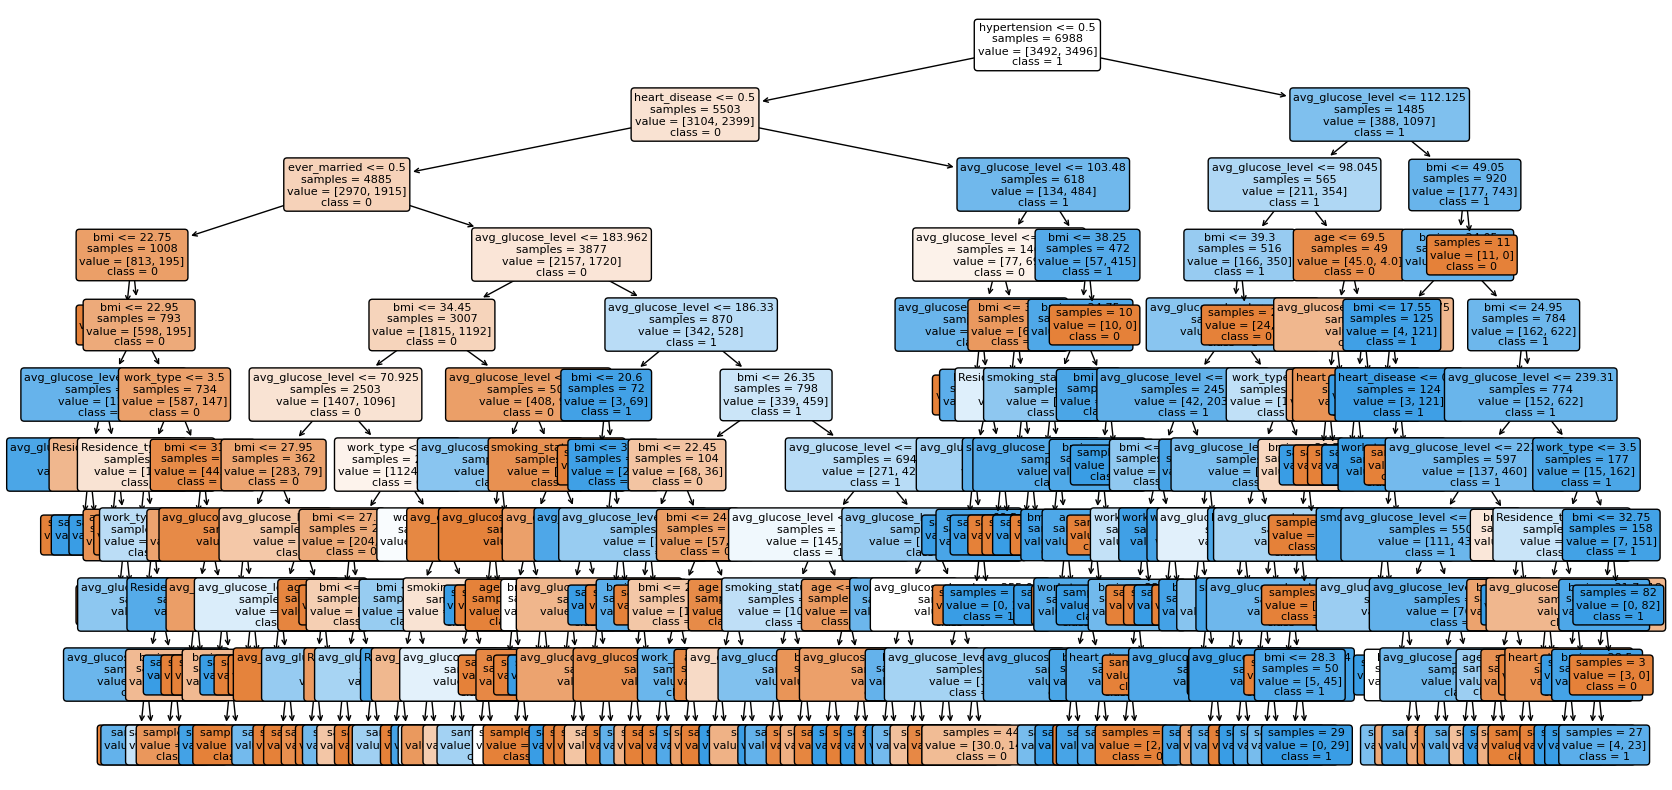

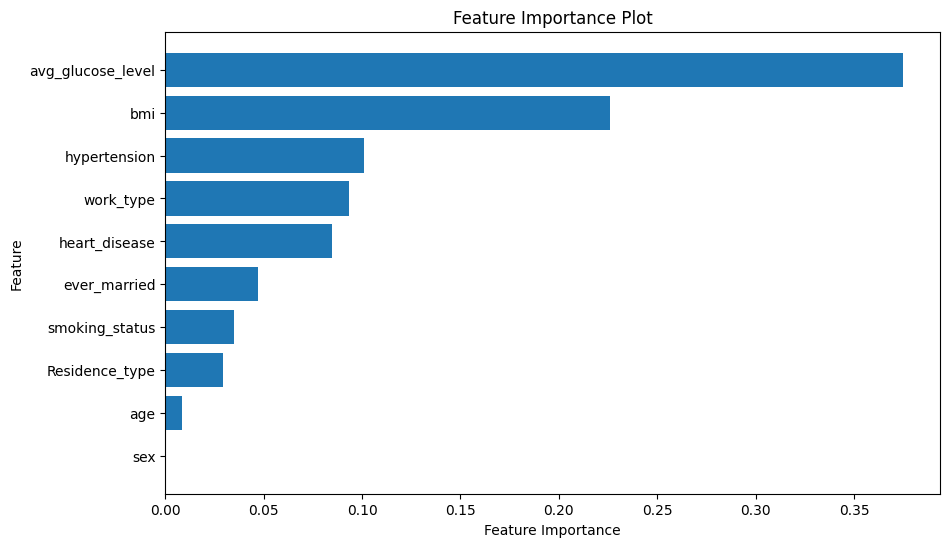

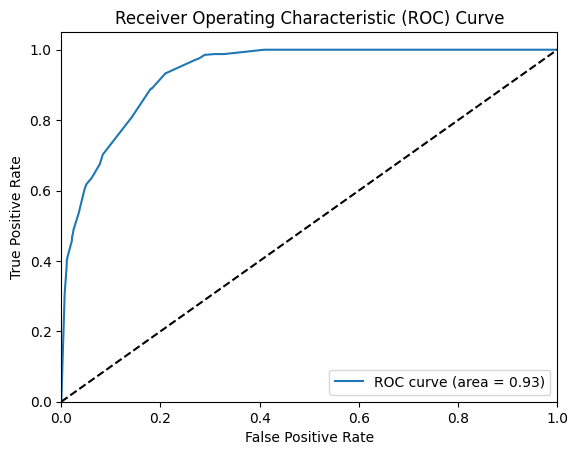

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9336453099807998
Accuracy for each fold: [0.7966666666666666, 0.82, 0.7966666666666666, 0.79, 0.8233333333333334, 0.7733333333333333, 0.7658862876254181, 0.8461538461538461, 0.7959866220735786, 0.7424749163879598]
Mean accuracy: 0.7950501672240803
95% confidence interval: (0.7735207703019173, 0.8165795641462432)


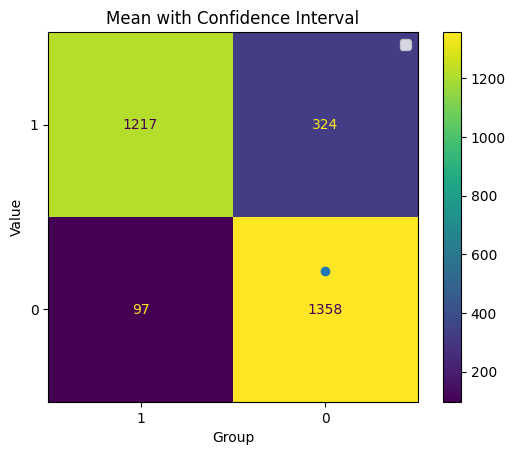

In [20]:
decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



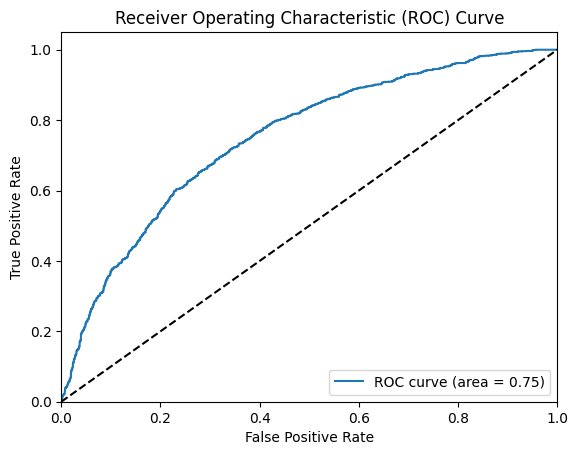

AUC Score: 0.7487577799037086


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.64, 0.65, 0.6733333333333333, 0.6433333333333333, 0.7033333333333334, 0.7133333333333334, 0.7123745819397993, 0.6722408026755853, 0.6488294314381271, 0.6387959866220736]
Mean accuracy: 0.6695574136008918
95% confidence interval: (0.6479229920966086, 0.691191835105175)


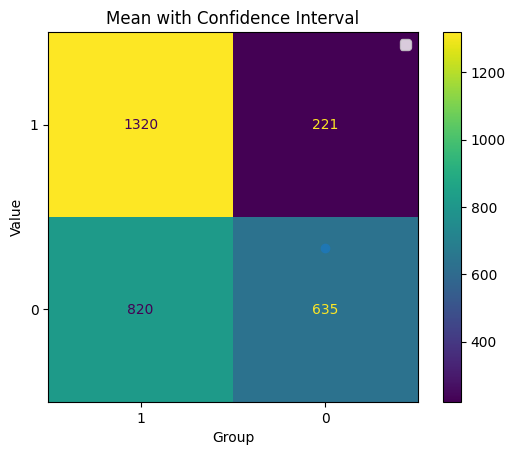

--------------------------------------


In [21]:
svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


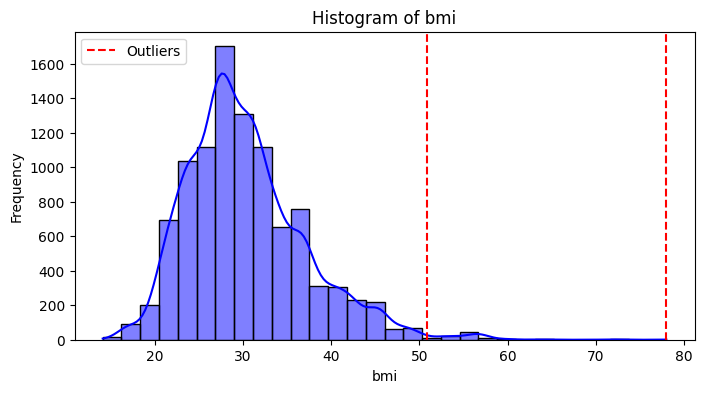

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


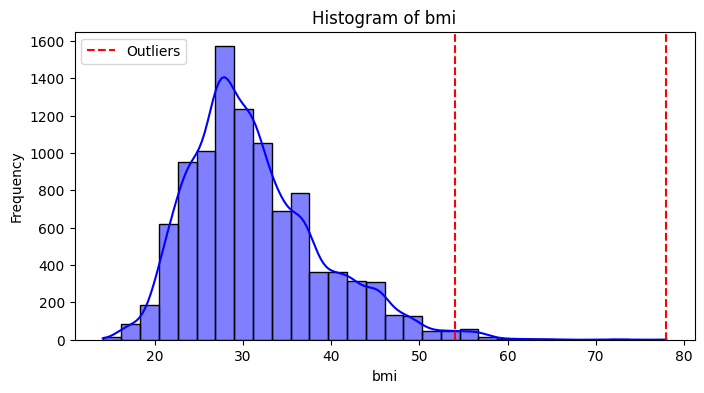

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1541
           1       0.79      0.93      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.611274, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3494, 3494]\nclass = 0')


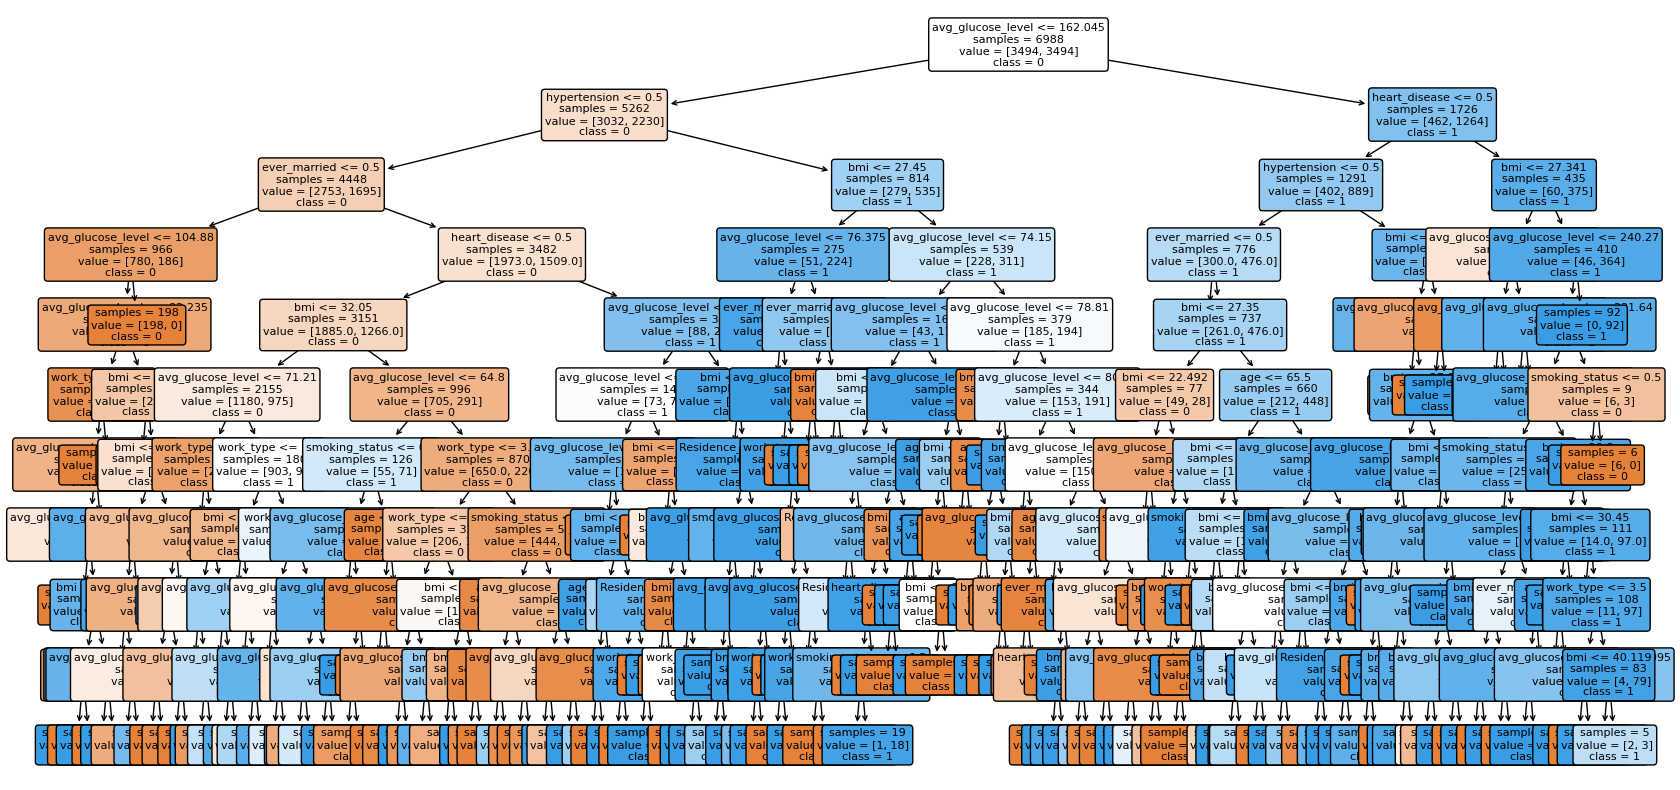

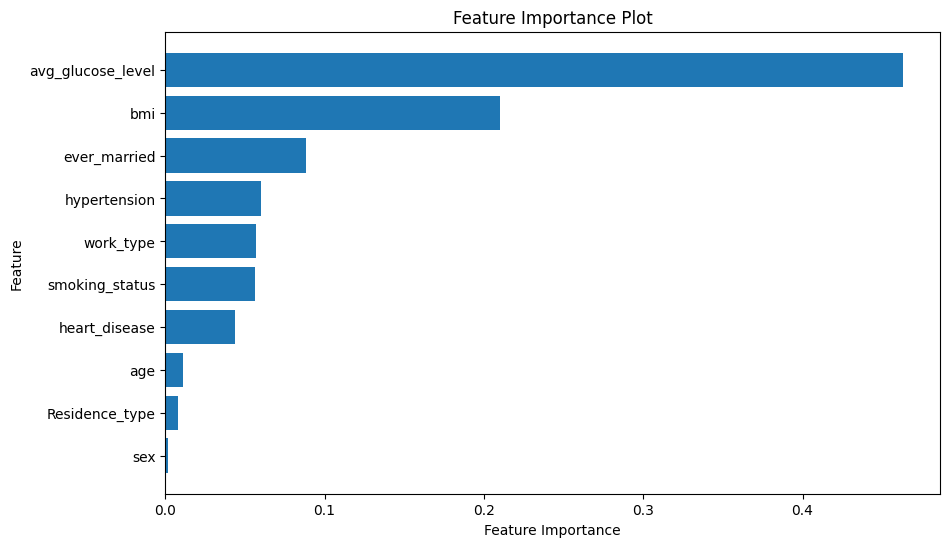

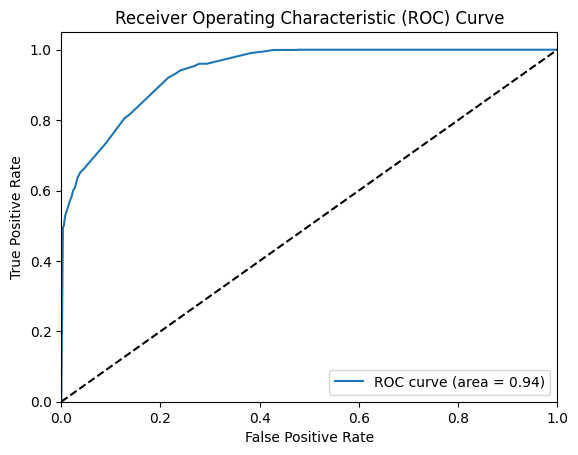

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.939439512433351
Accuracy for each fold: [0.8266666666666667, 0.8233333333333334, 0.79, 0.8133333333333334, 0.84, 0.82, 0.782608695652174, 0.7926421404682275, 0.782608695652174, 0.8327759197324415]
Mean accuracy: 0.8103968784838349
95% confidence interval: (0.7949697397657758, 0.825824017201894)


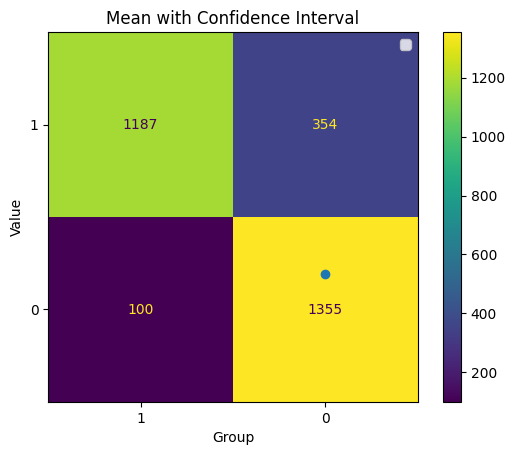

In [26]:
decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



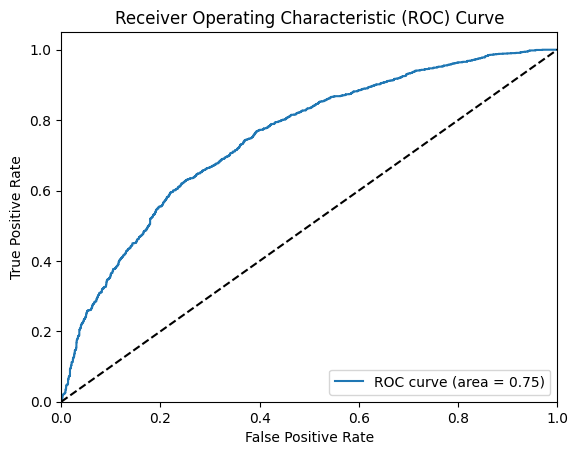

AUC Score: 0.7503071821528842


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.72, 0.66, 0.6633333333333333, 0.72, 0.61, 0.66, 0.6688963210702341, 0.5819397993311036, 0.725752508361204, 0.6688963210702341]
Mean accuracy: 0.6678818283166109
95% confidence interval: (0.6344432348806645, 0.7013204217525574)


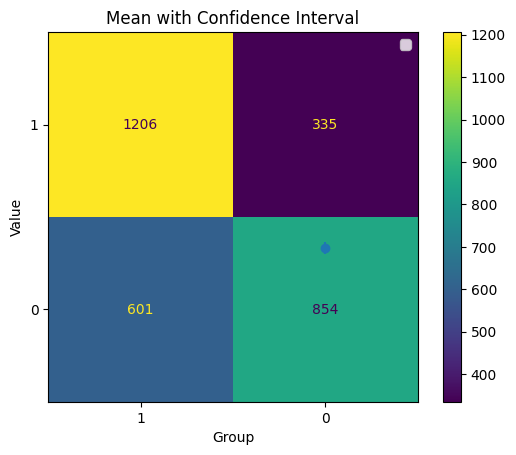

In [27]:
svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


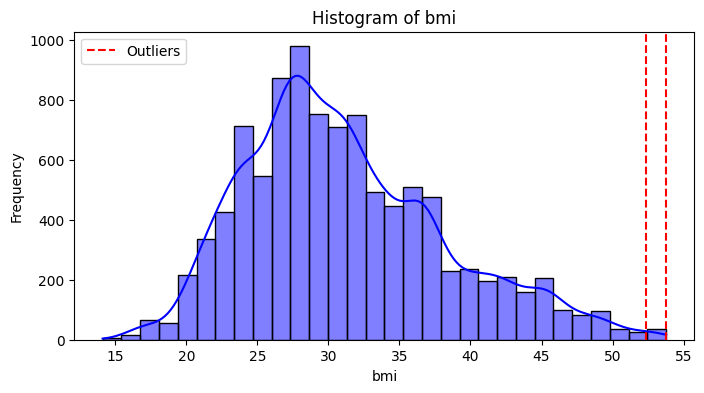

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1541
           1       0.79      0.94      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.609854, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3494, 3494]\nclass = 0')


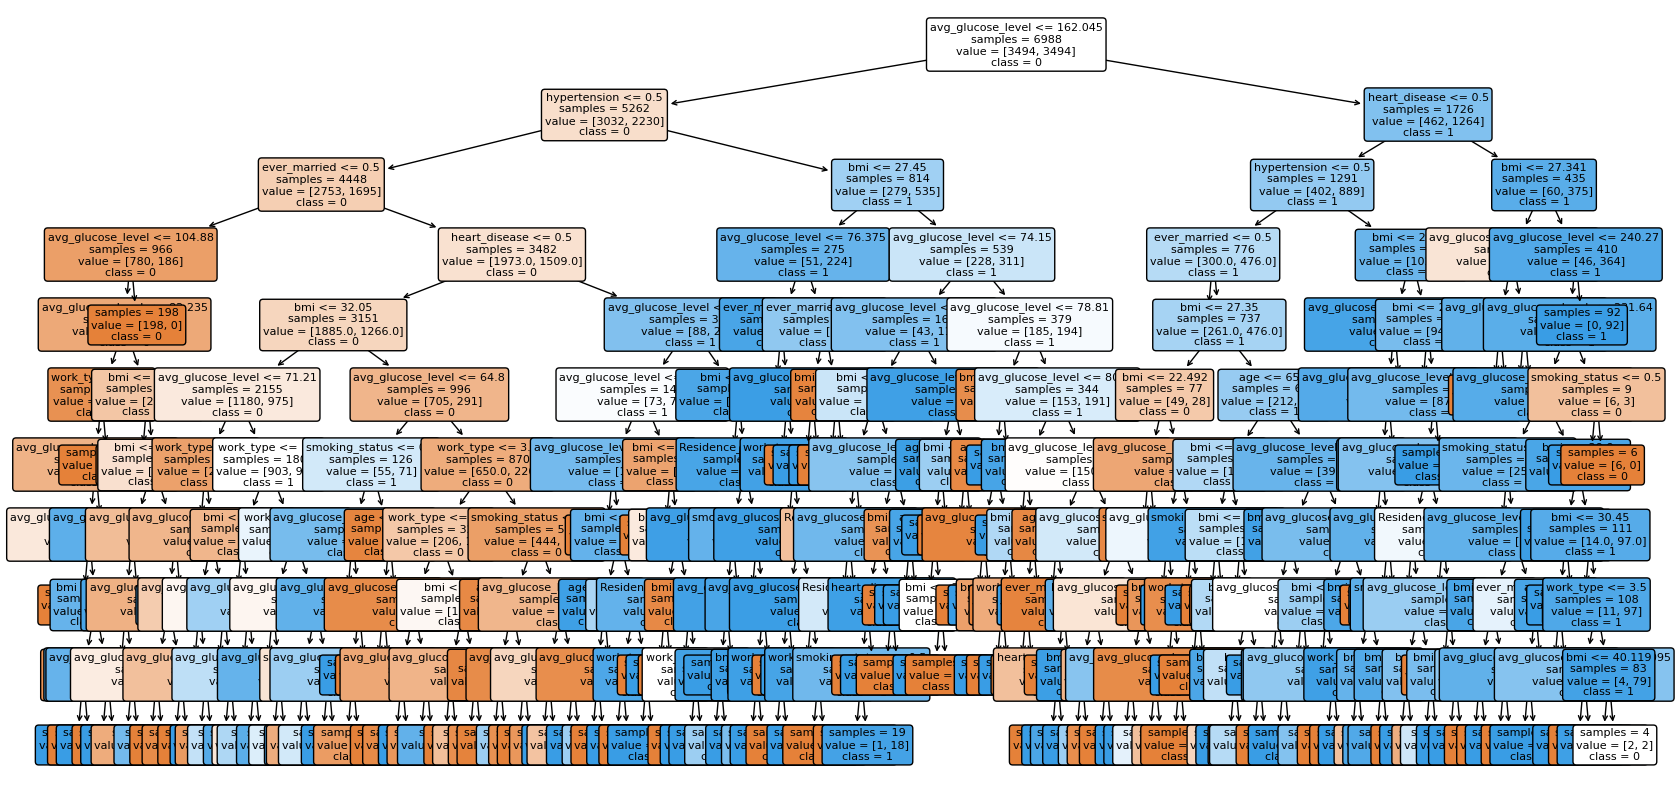

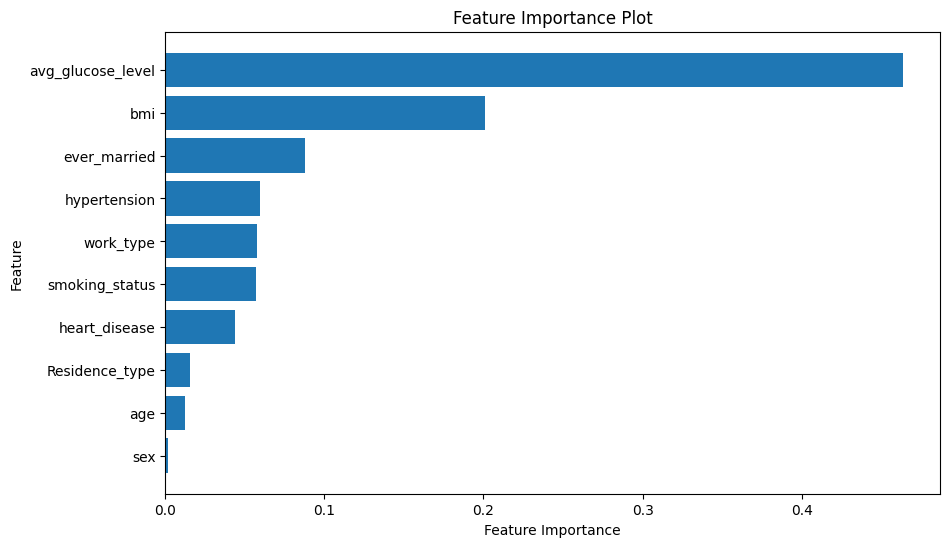

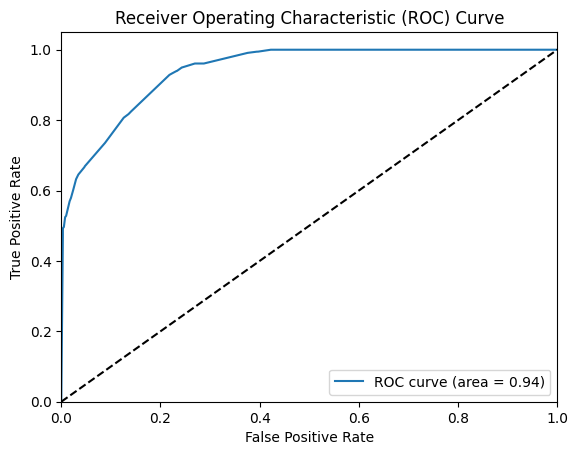

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9409715207021816
Accuracy for each fold: [0.7833333333333333, 0.7566666666666667, 0.84, 0.79, 0.8, 0.8133333333333334, 0.7926421404682275, 0.8160535117056856, 0.8127090301003345, 0.7926421404682275]
Mean accuracy: 0.7997380156075808
95% confidence interval: (0.7836355842092215, 0.8158404470059402)


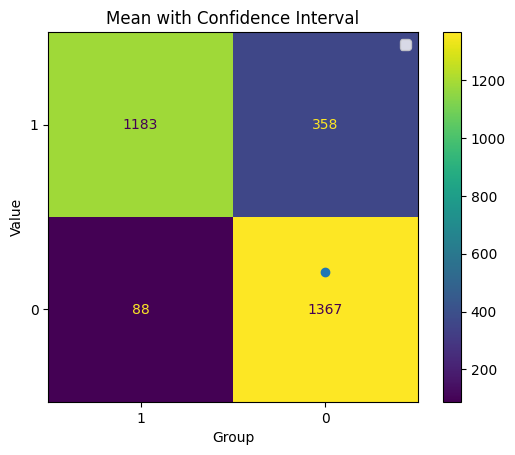

In [30]:
decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.69      0.68      2996
weighted avg       0.69      0.69      0.69      2996



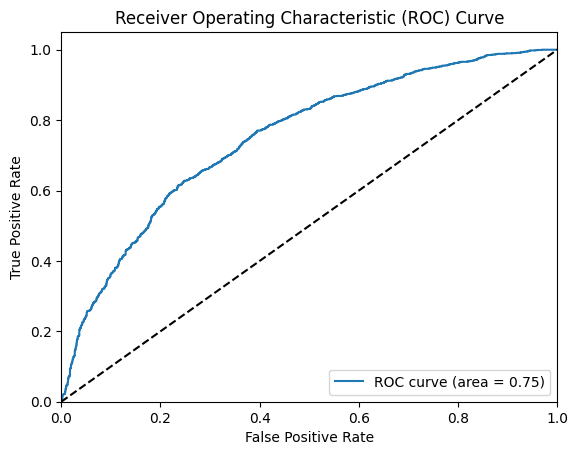

AUC Score: 0.750259906206306


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6833333333333333, 0.6733333333333333, 0.7366666666666667, 0.6366666666666667, 0.6266666666666667, 0.65, 0.6923076923076923, 0.6956521739130435, 0.6588628762541806, 0.6521739130434783]
Mean accuracy: 0.6705663322185063
95% confidence interval: (0.647182819999347, 0.6939498444376655)


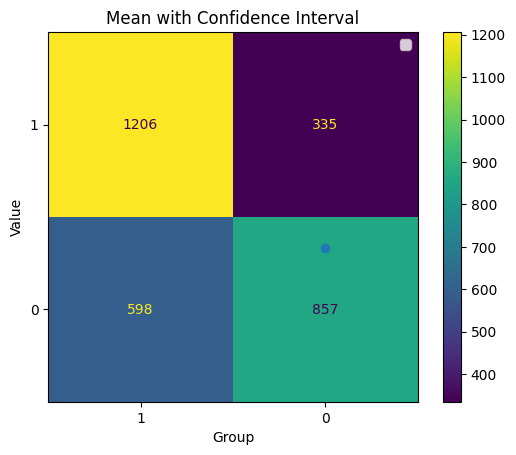

--------------------------------------


In [31]:
svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## Categorical

In [32]:
df = df_original.copy()

Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


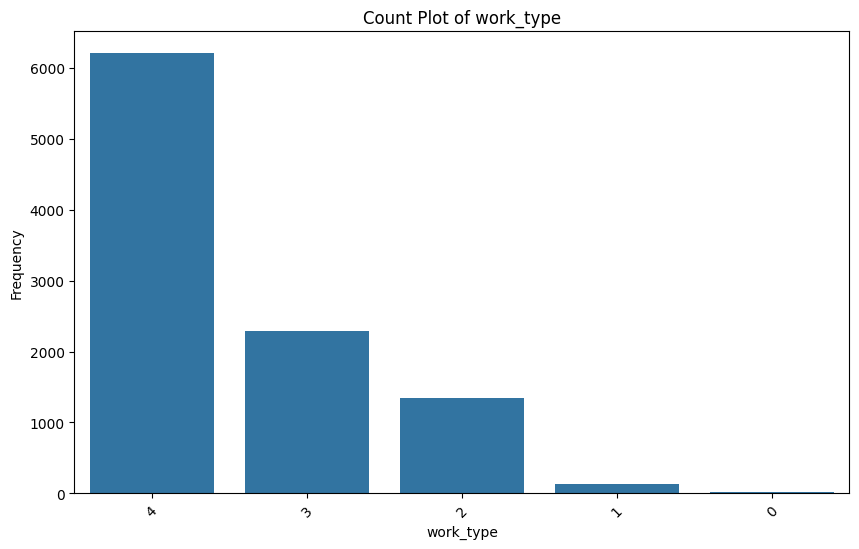

In [33]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 10, df)

Valore meno frequente:  0


Value counts:
work_type
4    5590
3    2051
2    1209
0    1018
1     116
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


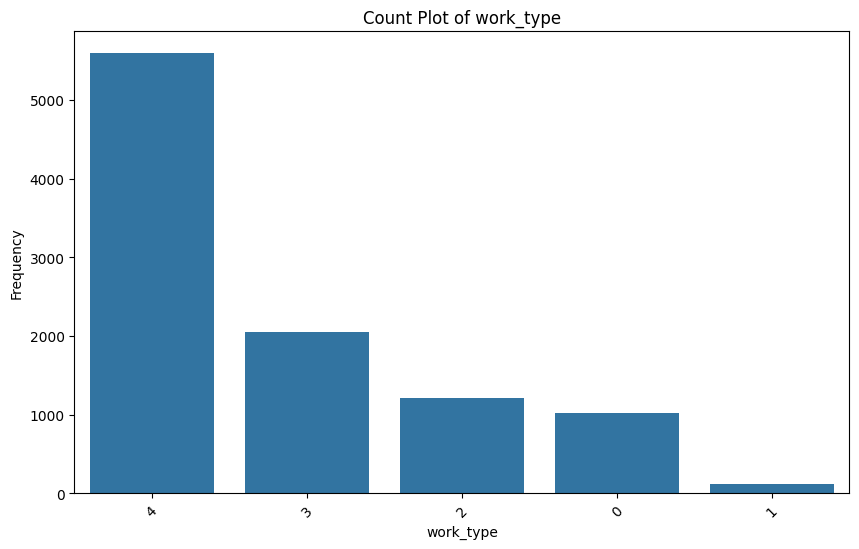

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1541
           1       0.77      0.96      0.86      1455

    accuracy                           0.84      2996
   macro avg       0.86      0.85      0.84      2996
weighted avg       0.86      0.84      0.84      2996

Node Labels:
 Annotation(0.627943, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


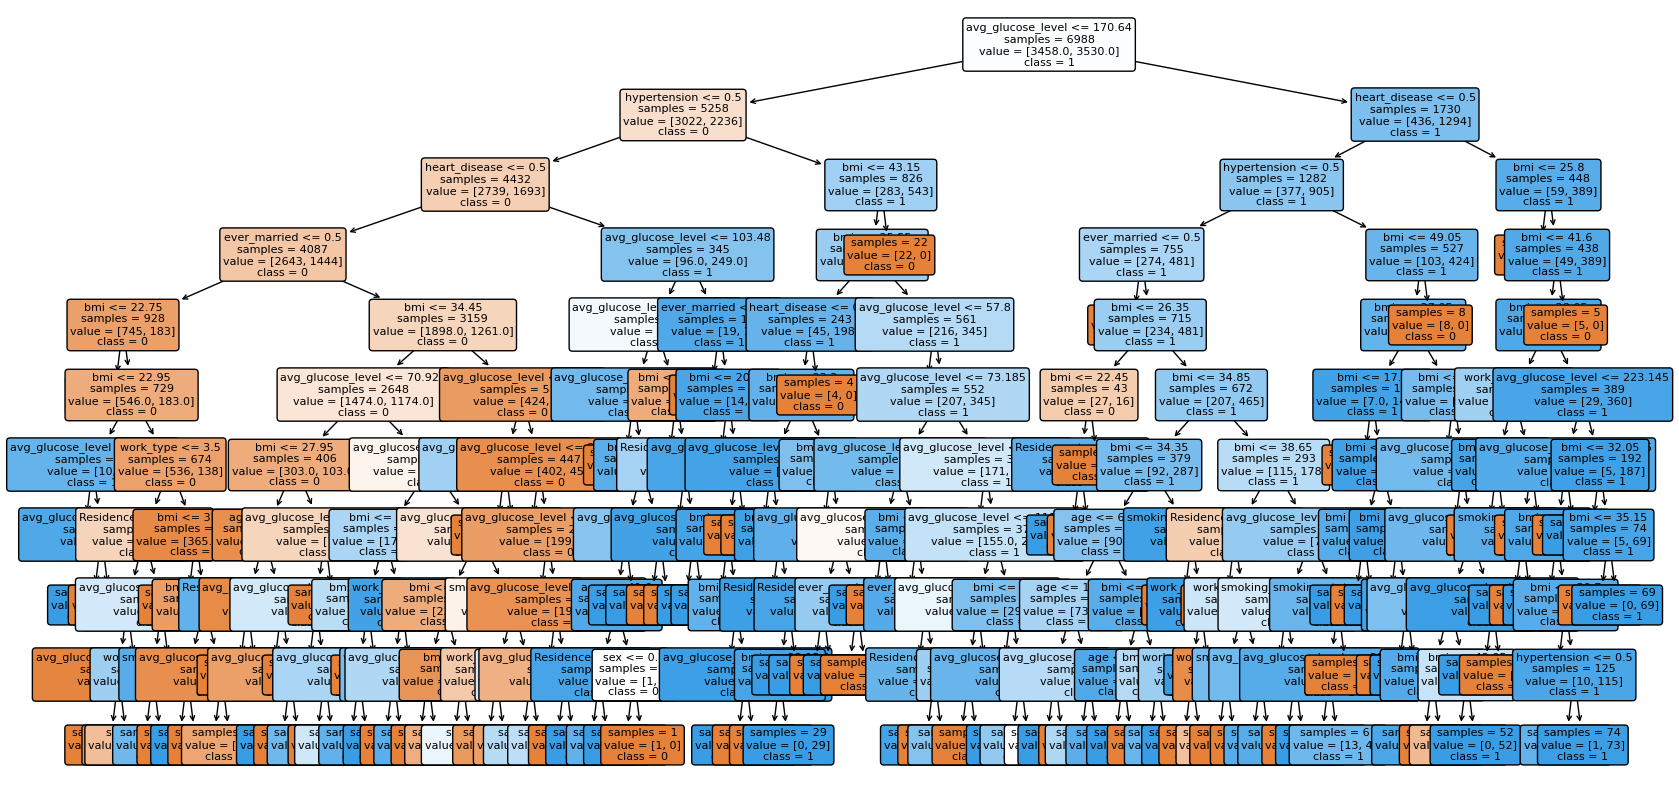

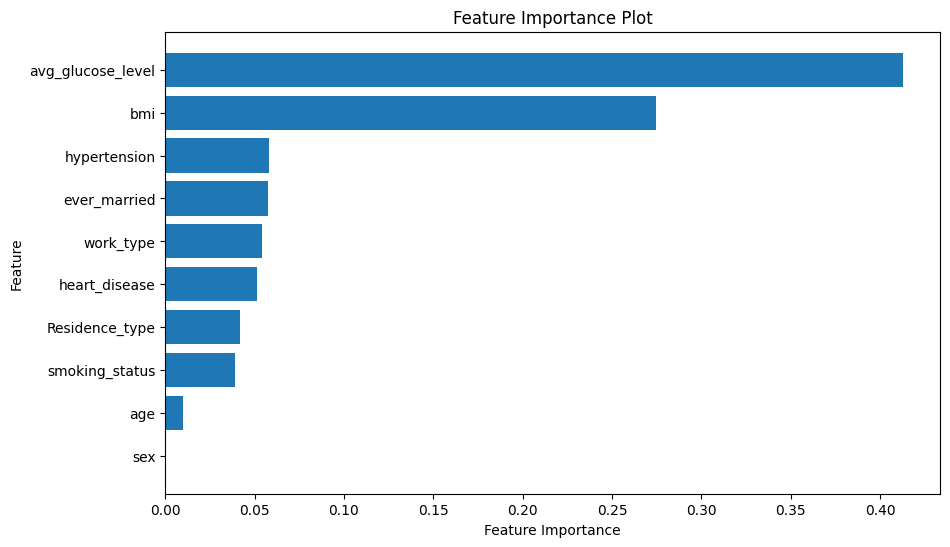

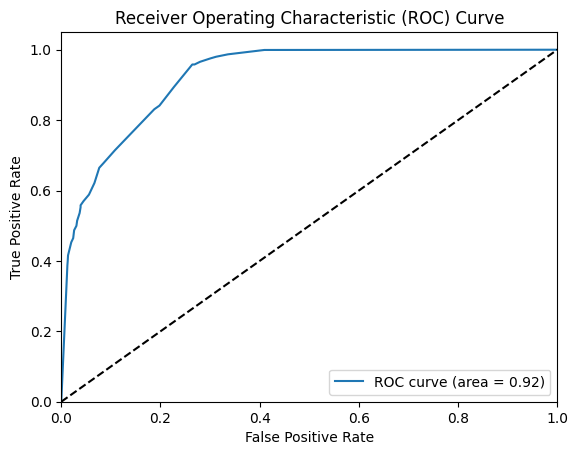

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9224170496687338
Accuracy for each fold: [0.8166666666666667, 0.8166666666666667, 0.8, 0.8033333333333333, 0.8166666666666667, 0.7966666666666666, 0.8294314381270903, 0.8193979933110368, 0.8461538461538461, 0.842809364548495]
Mean accuracy: 0.8187792642140467
95% confidence interval: (0.8067752361459877, 0.8307832922821057)


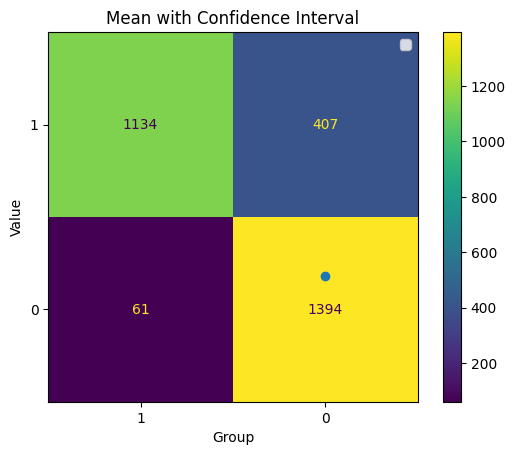

In [36]:
decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1541
           1       0.72      0.58      0.64      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



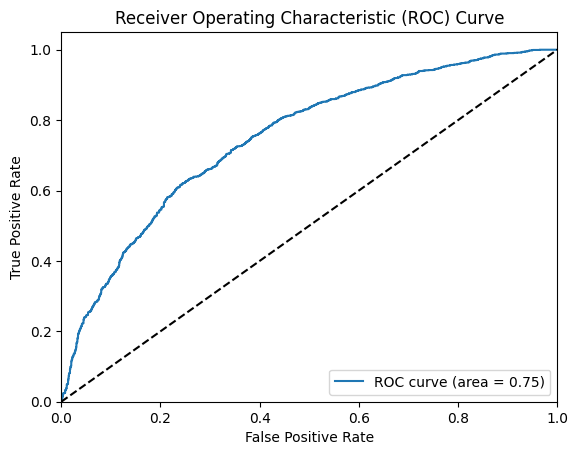

AUC Score: 0.7488710637756979


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.65, 0.6333333333333333, 0.69, 0.6733333333333333, 0.6333333333333333, 0.6566666666666666, 0.705685618729097, 0.6755852842809364, 0.6755852842809364, 0.6254180602006689]
Mean accuracy: 0.6618940914158306
95% confidence interval: (0.6429013636467733, 0.6808868191848878)


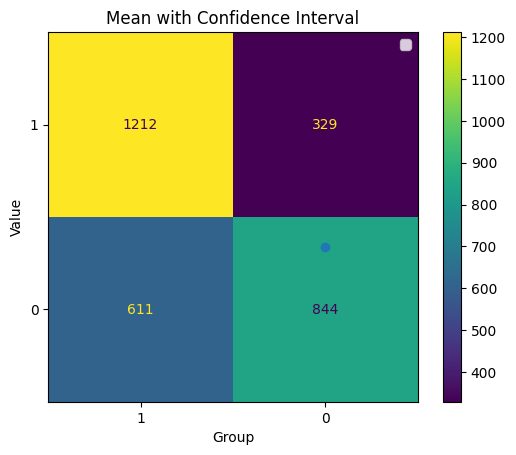

--------------------------------------


In [37]:
svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

print('--------------------------------------')